<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Loading Data</font></h1>

## Introduction


Crack detection has vital importance for structural health monitoring and inspection. In this series of labs, you learn everything you need to efficiently build a classifier using a pre-trained model that would detect cracks in images of concrete. For problem formulation, we will denote images of cracked concrete as the positive class and images of concrete with no cracks as the negative class.

In this lab, I will walk you through the process of loading and visualizing the image dataset. 

**Please note**: You will encounter questions that you will need to answer in order to complete the quiz for this module.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item11">Download Data</a>
2. <a href="#item12">Import Libraries and Packages</a>  
3. <a href="#item13">Load Images</a>
</font>
    
</div>

<a id='item11'></a>

## Download Data

For your convenience, I have placed the data on a server which you can retrieve easily using the **wget** command. So let's run the following line of code to get the data. Given the large size of the image dataset, it might take some time depending on your internet speed.

In [1]:
# get the data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip

--2020-09-03 16:12:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245259777 (234M) [application/zip]
Saving to: ‘concrete_crack_images_for_classification.zip’

concrete_crack_imag 100%[===================>] 233.90M  23.0MB/s    in 10s     

2020-09-03 16:12:30 (22.9 MB/s) - ‘concrete_crack_images_for_classification.zip’ saved [245259777/245259777]



And now if you check the left directory pane, you should see the zipped file *concrete_crack_images_for_classification.zip* appear. So, let's go ahead and unzip the file to access the images. Given the large number of images in the dataset, this might take a couple of minutes, so please be patient, and wait until the code finishes running.

In [4]:
!unzip concrete_crack_images_for_classification.zip

Archive:  concrete_crack_images_for_classification.zip
replace Negative/18476.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Now, you should see two folders appear in the left pane: *Positive* and *Negative*. *Negative* is the negative class like we defined it earlier and it represents the concrete images with no cracks. *Positive* on the other hand is the positive class and represents the concrete images with cracks.

**Important Note**: There are thousands and thousands of images in each folder, so please don't attempt to double click on the folders. This may consume all of your memory and you may end up with a **50*** error. So please **DO NOT DO IT**.

<a id='item12'></a>

## Import Libraries and Packages

Before we proceed, let's import the libraries and packages that we will need to complete the rest of this lab.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

<a id='item13'></a>

## Load Images

Next, we will use the standard approach of loading all images into memory and demonstrate how this approach is not efficient at all when it comes to building deep learning models for classifying images.

Let's start by reading in the negative images. First, we will use **os.scandir** to build an iterator to iterate through *./Negative* directory that contains all the images with no cracks.

In [6]:
negative_files = os.scandir('./Negative')
negative_files

Then, we will grab the first file in the directory.

In [7]:
file_name = next(negative_files)
file_name

<DirEntry '10954.jpg'>

Since the directory can contain elements that are not files, we will only read the element if it is a file.

In [8]:
os.path.isfile(file_name)

True

Get the image name.

In [9]:
image_name = str(file_name).split("'")[1]
image_name

'10954.jpg'

Read in the image data.

In [10]:
image_data = plt.imread('./Negative/{}'.format(image_name))
image_data

array([[[177, 172, 166],
        [176, 171, 165],
        [176, 171, 165],
        ...,
        [194, 185, 180],
        [190, 181, 176],
        [186, 177, 172]],

       [[179, 174, 168],
        [177, 172, 166],
        [177, 172, 166],
        ...,
        [181, 172, 167],
        [178, 169, 164],
        [174, 165, 160]],

       [[179, 174, 168],
        [178, 173, 167],
        [178, 173, 167],
        ...,
        [172, 163, 158],
        [169, 160, 155],
        [167, 158, 153]],

       ...,

       [[187, 183, 172],
        [186, 182, 171],
        [186, 182, 171],
        ...,
        [164, 155, 146],
        [155, 146, 137],
        [148, 139, 130]],

       [[185, 181, 170],
        [186, 182, 171],
        [186, 182, 171],
        ...,
        [172, 163, 154],
        [163, 154, 145],
        [156, 147, 138]],

       [[183, 179, 168],
        [185, 181, 170],
        [187, 183, 172],
        ...,
        [178, 169, 160],
        [169, 160, 151],
        [162, 153, 144]]

### **Question**: What is the dimension of a single image according to **image_data**? 

In [11]:
## You can use this cell to type your code to answer the above question

image_data.shape

(227, 227, 3)

Let's view the image.

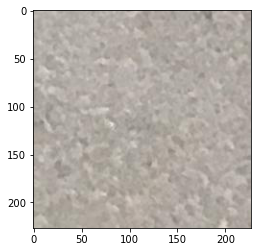

In [12]:
plt.imshow(image_data)

Now that we are familiar with the process of reading in an image data, let's loop through all the image in the *./Negative* directory and read them all in and save them in the list **negative_images**. We will also time it to see how long it takes to read in all the images.

In [14]:
%%time

negative_images = []
for file_name in negative_files:
    if os.path.isfile(file_name):
        image_name = str(file_name).split("'")[1]
        image_data = plt.imread('./Negative/{}'.format(image_name))
        negative_images.append(image_data)
    
negative_images = np.array(negative_images)

CPU times: user 17.3 s, sys: 2.54 s, total: 19.8 s
Wall time: 1min 8s


Oops! The kernel died due to an out-of-memory error. Since the kernel died, you may have to run the above cell to load the libraries and packages again.

Loading images into memory is definitely not the right approach when working with images as you can hit your limit on memory and other resources fairly quickly. Therefore, let's repeat the previous process but let's save the paths to the images in a variable instead of loading and saving the images themselves.

So instead of using **os.scandir**, we will use **os.listdir**.

In [16]:
negative_images = os.listdir('./Negative')
negative_images

['10954.jpg',
 '13745.jpg',
 '10495.jpg',
 '00316.jpg',
 '17259.jpg',
 '15775.jpg',
 '13384.jpg',
 '10006.jpg',
 '19919.jpg',
 '04592.jpg',
 '00624.jpg',
 '06340.jpg',
 '17441.jpg',
 '12661.jpg',
 '07088.jpg',
 '19026.jpg',
 '16599.jpg',
 '19108.jpg',
 '07670.jpg',
 '17818.jpg',
 '18704.jpg',
 '00880.jpg',
 '02855.jpg',
 '15867.jpg',
 '09145.jpg',
 '14665.jpg',
 '15284.jpg',
 '00191.jpg',
 '15157.jpg',
 '07308.jpg',
 '00180.jpg',
 '05045.jpg',
 '02421.jpg',
 '11820.jpg',
 '16535.jpg',
 '06388.jpg',
 '04730.jpg',
 '10651.jpg',
 '02444.jpg',
 '12955.jpg',
 '02734.jpg',
 '19534.jpg',
 '01033.jpg',
 '18383.jpg',
 '02830.jpg',
 '03938.jpg',
 '13962.jpg',
 '15642.jpg',
 '16050.jpg',
 '06668.jpg',
 '04375.jpg',
 '17852.jpg',
 '10092.jpg',
 '15730.jpg',
 '07416.jpg',
 '18875.jpg',
 '08544.jpg',
 '17563.jpg',
 '12533.jpg',
 '03170.jpg',
 '14515.jpg',
 '11632.jpg',
 '17629.jpg',
 '02772.jpg',
 '04415.jpg',
 '12247.jpg',
 '07953.jpg',
 '10130.jpg',
 '03410.jpg',
 '13129.jpg',
 '11773.jpg',
 '1524

Notice how the images are not sorted, so let's call the <code>sort</code> method to sort the images.

In [17]:
negative_images.sort()
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Before we can show an image, we need to open it, which we can do using the **Image** module in the **PIL** library. So to open the first image, we run the following:

In [18]:
image_data = Image.open('./Negative/{}'.format(negative_images[0]))

Then to view the image, you can simply run:

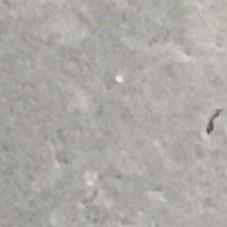

In [19]:
image_data

or use the <code>imshow</code> method as follows:

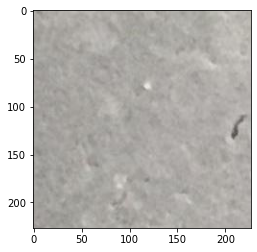

In [20]:
plt.imshow(image_data)

Let's loop through all the images in the <code>./Negative</code> directory and add save their paths.

In [21]:
negative_images_dir = ['./Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['./Negative/00001.jpg',
 './Negative/00002.jpg',
 './Negative/00003.jpg',
 './Negative/00004.jpg',
 './Negative/00005.jpg',
 './Negative/00006.jpg',
 './Negative/00007.jpg',
 './Negative/00008.jpg',
 './Negative/00009.jpg',
 './Negative/00010.jpg',
 './Negative/00011.jpg',
 './Negative/00012.jpg',
 './Negative/00013.jpg',
 './Negative/00014.jpg',
 './Negative/00015.jpg',
 './Negative/00016.jpg',
 './Negative/00017.jpg',
 './Negative/00018.jpg',
 './Negative/00019.jpg',
 './Negative/00020.jpg',
 './Negative/00021.jpg',
 './Negative/00022.jpg',
 './Negative/00023.jpg',
 './Negative/00024.jpg',
 './Negative/00025.jpg',
 './Negative/00026.jpg',
 './Negative/00027.jpg',
 './Negative/00028.jpg',
 './Negative/00029.jpg',
 './Negative/00030.jpg',
 './Negative/00031.jpg',
 './Negative/00032.jpg',
 './Negative/00033.jpg',
 './Negative/00034.jpg',
 './Negative/00035.jpg',
 './Negative/00036.jpg',
 './Negative/00037.jpg',
 './Negative/00038.jpg',
 './Negative/00039.jpg',
 './Negative/00040.jpg',


Let's check how many images with no cracks exist in the dataset.

In [22]:
len(negative_images_dir)

20000

### Question: Show the next four images.

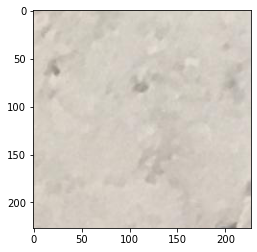

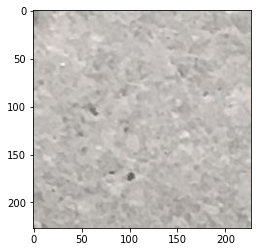

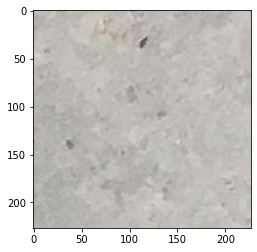

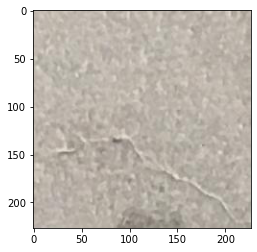

In [24]:
## You can use this cell to type your code to answer the above question

for i in negative_images_dir[1:5]:
    temp=plt.imread(i)
    plt.imshow(temp)
    plt.show()

**Your turn**: Save the paths to all the images in the *./Positive* directory in a list called **positive_images_dir**. Make sure to sort the paths.

In [27]:
## Type your answer here
#Made dirctory
positive_images = os.listdir('./Positive')
positive_images

['11857_1.jpg',
 '00316.jpg',
 '10746_1.jpg',
 '19919.jpg',
 '04592.jpg',
 '19363_1.jpg',
 '13324_1.jpg',
 '00624.jpg',
 '06340.jpg',
 '07088.jpg',
 '07670.jpg',
 '12426_1.jpg',
 '18107_1.jpg',
 '00880.jpg',
 '02855.jpg',
 '09145.jpg',
 '18270_1.jpg',
 '15667_1.jpg',
 '18825_1.jpg',
 '16639_1.jpg',
 '00191.jpg',
 '07308.jpg',
 '00180.jpg',
 '05045.jpg',
 '02421.jpg',
 '11149_1.jpg',
 '06388.jpg',
 '04730.jpg',
 '13031_1.jpg',
 '13229_1.jpg',
 '11421_1.jpg',
 '17762_1.jpg',
 '02444.jpg',
 '02734.jpg',
 '19534.jpg',
 '13190_1.jpg',
 '18374_1.jpg',
 '16774_1.jpg',
 '01033.jpg',
 '02830.jpg',
 '03938.jpg',
 '10309_1.jpg',
 '19306_1.jpg',
 '06668.jpg',
 '04375.jpg',
 '11371_1.jpg',
 '15839_1.jpg',
 '15959_1.jpg',
 '07416.jpg',
 '08544.jpg',
 '03170.jpg',
 '02772.jpg',
 '04415.jpg',
 '07953.jpg',
 '03410.jpg',
 '11129_1.jpg',
 '17523_1.jpg',
 '12241_1.jpg',
 '14801_1.jpg',
 '16250_1.jpg',
 '04907.jpg',
 '16144_1.jpg',
 '12203_1.jpg',
 '05582.jpg',
 '10131_1.jpg',
 '01738.jpg',
 '11984_1.jpg'

In [28]:
#sorted
positive_images.sort()
positive_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

In [30]:
positive_images_dir = ['./Positive/{}'.format(image) for image in negative_images]
positive_images_dir


['./Positive/00001.jpg',
 './Positive/00002.jpg',
 './Positive/00003.jpg',
 './Positive/00004.jpg',
 './Positive/00005.jpg',
 './Positive/00006.jpg',
 './Positive/00007.jpg',
 './Positive/00008.jpg',
 './Positive/00009.jpg',
 './Positive/00010.jpg',
 './Positive/00011.jpg',
 './Positive/00012.jpg',
 './Positive/00013.jpg',
 './Positive/00014.jpg',
 './Positive/00015.jpg',
 './Positive/00016.jpg',
 './Positive/00017.jpg',
 './Positive/00018.jpg',
 './Positive/00019.jpg',
 './Positive/00020.jpg',
 './Positive/00021.jpg',
 './Positive/00022.jpg',
 './Positive/00023.jpg',
 './Positive/00024.jpg',
 './Positive/00025.jpg',
 './Positive/00026.jpg',
 './Positive/00027.jpg',
 './Positive/00028.jpg',
 './Positive/00029.jpg',
 './Positive/00030.jpg',
 './Positive/00031.jpg',
 './Positive/00032.jpg',
 './Positive/00033.jpg',
 './Positive/00034.jpg',
 './Positive/00035.jpg',
 './Positive/00036.jpg',
 './Positive/00037.jpg',
 './Positive/00038.jpg',
 './Positive/00039.jpg',
 './Positive/00040.jpg',


### Question: How many images of cracked concrete exist in the *./Positive* directory?

In [31]:
## You can use this cell to type your code to answer the above question
len(positive_images_dir)

20000

### Question: Show the first four images with cracked concrete.

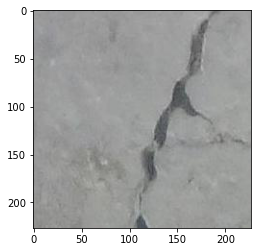

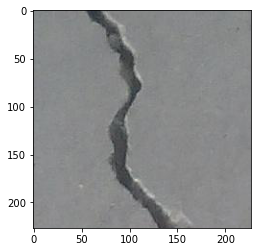

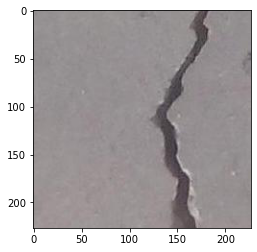

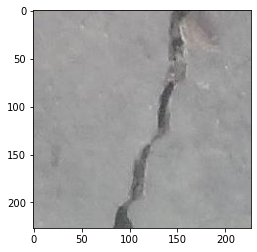

In [32]:
## You can use this cell to type your code to answer the above question

for i in positive_images_dir[1:5]:
    temp=plt.imread(i)
    plt.imshow(temp)
    plt.show()

### Thank you for completing this lab!

This notebook was created by Alex Aklson. I hope you found this lab interesting and educational.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week1_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).